### 数据预处理

#### 通过describe函数获取基本信息

In [4]:
import pandas
titanic=pandas.read_csv("train.csv")
print (titanic.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


#### 训练集存活率

<AxesSubplot:ylabel='Survived'>

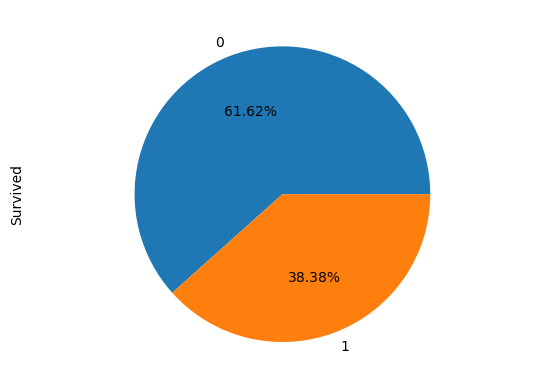

In [5]:
import matplotlib.pyplot as plt
plt.axis('equal')       #行宽相同
titanic['Survived'].value_counts().plot.pie(autopct='%1.2f%%')

#### 年龄分布情况

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

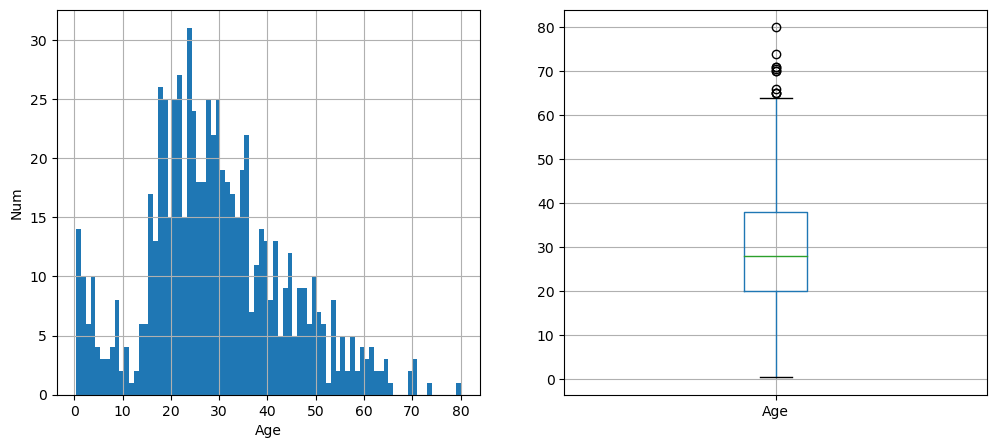

In [6]:
import matplotlib.pyplot as plt
# 年龄数据的分布情况
plt.figure(figsize=(12,5))

plt.subplot(121)
titanic['Age'].hist(bins=80)
plt.xlabel('Age')
plt.ylabel('Num')

plt.subplot(122)
titanic.boxplot(column='Age',showfliers=True) # 是否显示异常值

titanic['Age'].describe()

#### 性别与存活率的关系

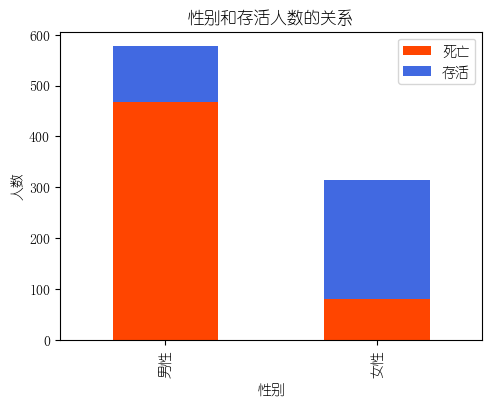

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
matplotlib.rc("font",family='YouYuan')
sur_m = titanic.loc[titanic['Sex']=='male','Survived'].value_counts()
sur_f = titanic.loc[titanic['Sex']=='female','Survived'].value_counts()
sexDf = pd.DataFrame({'男性':sur_m,'女性':sur_f})
plt.figure(figsize=(12,4))
plt.figure(1)
# 绘制图1
ax1=plt.subplot(121)
sexDf.T.plot(ax=ax1,kind='bar',stacked=True, color=['orangered','royalblue'])
plt.xlabel('性别')
plt.ylabel('人数')
plt.title('性别和存活人数的关系')
plt.legend(labels=['死亡','存活'])
plt.show()


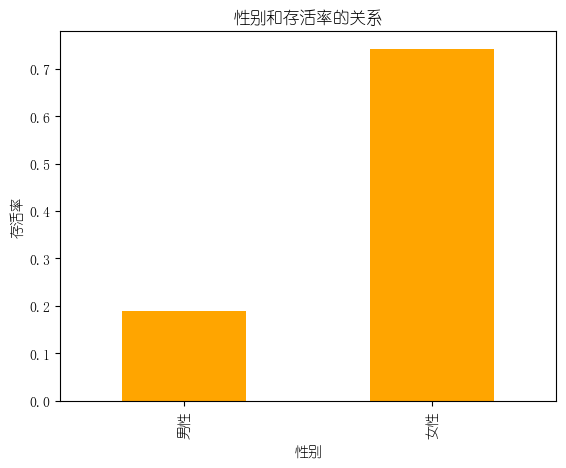

In [8]:
# 绘制图2
ax2 = plt.subplot(111)
for i in sexDf.columns:
    sexDf.loc['Survived Rate',i]=sexDf.loc[1,i]/sexDf[i].sum()
sexDf.loc['Survived Rate'].plot(ax=ax2,kind='bar',color='orange')
plt.title('性别和存活率的关系')
plt.xlabel('性别')
plt.ylabel('存活率')
plt.show()

#### 登船港口与存活率的关系

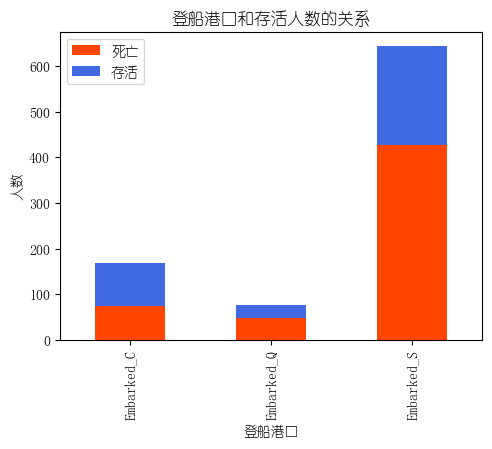

In [9]:

# 登船港口和存活率的关系
plt.figure(figsize=(12,4))
plt.figure(1)
# 绘制图1
ax1=plt.subplot(121)
sur_EC = titanic.loc[titanic['Embarked']=='C','Survived'].value_counts()
sur_EQ = titanic.loc[titanic['Embarked']=='Q','Survived'].value_counts()
sur_ES = titanic.loc[titanic['Embarked']=='S','Survived'].value_counts()
embarkedDf = pd.DataFrame({'Embarked_C':sur_EC,'Embarked_Q':sur_EQ,'Embarked_S':sur_ES})
embarkedDf.T.plot(ax=ax1,kind='bar',stacked=True, color=['orangered','royalblue'])
plt.xlabel('登船港口')
plt.ylabel('人数')
plt.title('登船港口和存活人数的关系')
plt.legend(labels=['死亡','存活'],loc='upper left')
plt.show()

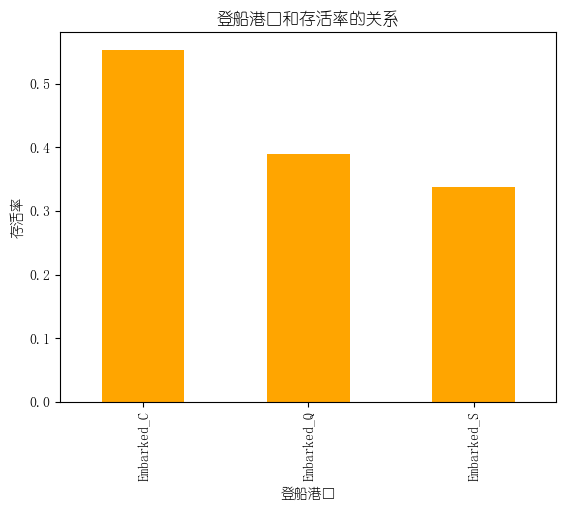

In [10]:
# 绘制图2
ax2 = plt.subplot(111)
for i in embarkedDf.columns:
    embarkedDf.loc['Survived Rate',i]=embarkedDf.loc[1,i]/embarkedDf[i].sum()
embarkedDf.loc['Survived Rate'].plot(ax=ax2,kind='bar',color='orange')
plt.title('登船港口和存活率的关系')
plt.xlabel('登船港口')
plt.ylabel('存活率')
plt.show()

#### 客舱等级和存活率的关系

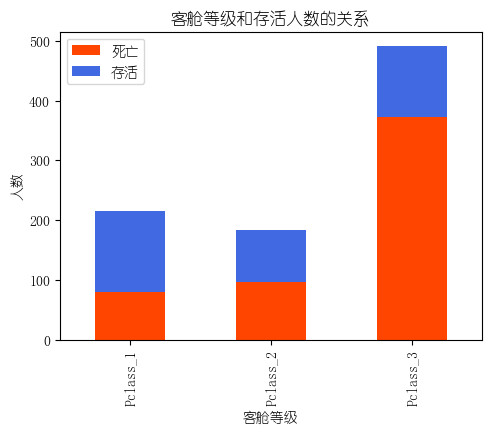

In [11]:
# 客舱等级和存活率的关系
plt.figure(figsize=(12,4))
plt.figure(1)
# 绘制图1
ax1=plt.subplot(121)
sur_P1 = titanic.loc[titanic['Pclass']==1,'Survived'].value_counts()
sur_P2 = titanic.loc[titanic['Pclass']==2,'Survived'].value_counts()
sur_P3 = titanic.loc[titanic['Pclass']==3,'Survived'].value_counts()
pclassDf = pd.DataFrame({'Pclass_1':sur_P1,'Pclass_2':sur_P2,'Pclass_3':sur_P3})
pclassDf.T.plot(ax=ax1,kind='bar',stacked=True, color=['orangered','royalblue'])
plt.xlabel('客舱等级')
plt.ylabel('人数')
plt.title('客舱等级和存活人数的关系')
plt.legend(labels=['死亡','存活'],loc='upper left')
plt.show()

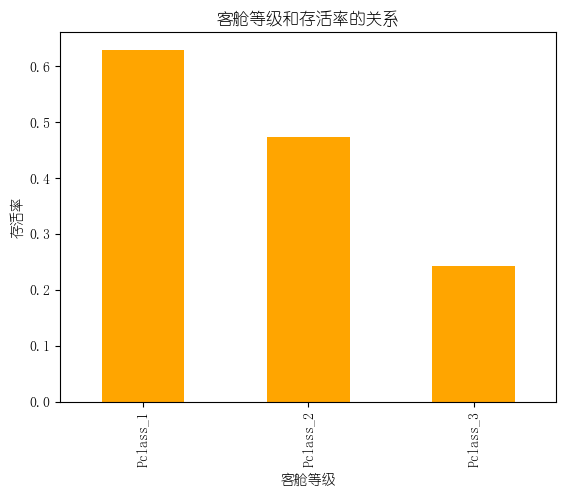

In [12]:
# 绘制图2
ax2 = plt.subplot(111)
for i in pclassDf.columns:
    pclassDf.loc['Survived Rate',i]=pclassDf.loc[1,i]/pclassDf[i].sum()
pclassDf.loc['Survived Rate'].plot(ax=ax2,kind='bar',color='orange')
plt.title('客舱等级和存活率的关系')
plt.xlabel('客舱等级')
plt.ylabel('存活率')
plt.show()

#### 均值填充

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.361582    0.523008   
std     257.353842    0.486592    0.836071   13.019697    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

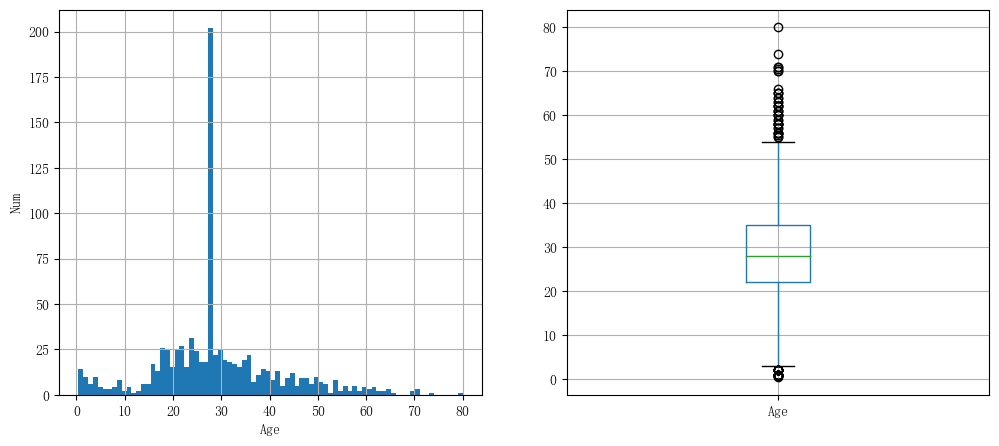

In [13]:
titanic['Age']=titanic['Age'].fillna(titanic['Age'].median())
print (titanic.describe())
import matplotlib.pyplot as plt
# 补全后年龄数据的分布情况
plt.figure(figsize=(12,5))

plt.subplot(121)
titanic['Age'].hist(bins=80)
plt.xlabel('Age')
plt.ylabel('Num')

plt.subplot(122)
titanic.boxplot(column='Age',showfliers=True) # 是否显示异常值

titanic['Age'].describe()

#### 数据规约

In [14]:
titanic.loc[titanic['Sex']=='male','Sex']=0
titanic.loc[titanic['Sex']=='female','Sex']=1

In [15]:
titanic['Embarked']=titanic['Embarked'].fillna('S')
titanic.loc[titanic['Embarked']=='S','Embarked']=0
titanic.loc[titanic['Embarked']=='C','Embarked']=1
titanic.loc[titanic['Embarked']=='Q','Embarked']=2

-----

### 回归算法预测

#### 线性回归

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
import numpy as np
predictors=["Pclass","Age","Parch","Fare","Sex","Embarked","SibSp"]
alg=LinearRegression()
#首先进行十折交叉预测
kf = KFold(n_splits=10)
predictions=[]
for train , test in kf.split(titanic):
  train_predictors=(titanic[predictors].iloc[train,:])
  train_target=titanic['Survived'].iloc[train]
  alg.fit(train_predictors,train_target)
  test_predictions=alg.predict(titanic[predictors].iloc[test,:])
  predictions.append(test_predictions)


predictions=np.concatenate(predictions)
predictions[predictions>.5]=1
predictions[predictions<.5]=0
accuracy=sum(predictions[predictions==titanic['Survived']])/len(predictions)
print(accuracy)

0.2615039281705948


#### 逻辑回归

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection

alg=LogisticRegression(max_iter=2000,random_state=1)
scores=model_selection.cross_val_score(alg,titanic[predictors],titanic['Survived'],cv=10)
print(scores.mean())

0.7957428214731584


### 随机森林

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection

predictors=["Pclass","Age","Parch","Fare","Sex","Embarked","SibSp"]
alg=RandomForestClassifier(random_state=1,n_estimators=50,min_samples_split=4,min_samples_leaf=2)
kf = model_selection.KFold(n_splits=10)
scores=model_selection.cross_val_score(alg,titanic[predictors],titanic['Survived'],cv=kf)

print(scores.mean())

0.8227340823970037


#### 模型改进

In [19]:
titanic['FamilySize']=titanic['SibSp']+titanic['Parch']

titanic['NameLength']=titanic['Name'].apply(lambda x:len(x))


In [20]:
import re
def get_title(name):
  title_search=re.search('([A-Za-z]+)\.',name)
  if title_search:
    return title_search.group(1)
  return ''

titles=titanic['Name'].apply(get_title)
print(pandas.value_counts(titles))

titles_mapping={"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Dr": 5, "Rev": 6, 
                "Major": 7,"Col": 7, "Mlle": 8, "Mme": 8, "Don": 9, "Lady": 10,
                "Countess": 10, "Jonkheer": 10, "Sir": 9, "Capt": 7, "Ms": 2}
for k,v in titles_mapping.items():
  titles[titles==k]=v

print(pandas.value_counts(titles))

titanic['Title']=titles

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Name, dtype: int64
1     517
2     183
3     125
4      40
5       7
6       6
7       5
8       3
10      3
9       2
Name: Name, dtype: int64


#### 计算特征重要程度

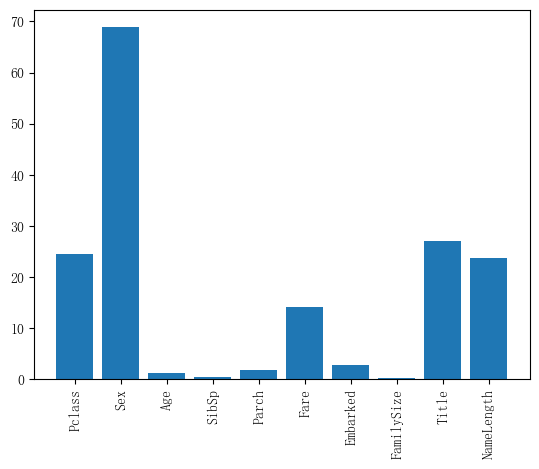

0.833932584269663


In [21]:
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pyplot as plt
predictors = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked", "FamilySize", "Title", "NameLength"]

# 对特征重要程度计算
selector = SelectKBest(f_classif, k=5)
selector.fit(titanic[predictors], titanic["Survived"])

scores = -np.log10(selector.pvalues_)

# 用直方图显示
plt.bar(range(len(predictors)), scores)
plt.xticks(range(len(predictors)), predictors, rotation='vertical')
plt.show()

# 选择较重要的特征进行拟合
predictors = ["Pclass", "Sex", "Fare", "Title"]

alg = RandomForestClassifier(random_state=1, n_estimators=50, min_samples_split=8, min_samples_leaf=4)
kf = model_selection.KFold(n_splits=10)
scores=model_selection.cross_val_score(alg,titanic[predictors],titanic['Survived'],cv=kf)

print(scores.mean())

### 集成算法

In [22]:
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np

# 进行算法集成
algorithms = [
    [GradientBoostingClassifier(random_state=1, n_estimators=25, max_depth=4), 
    ["Pclass", "Sex", "Age", "Fare", "Embarked", "FamilySize", "Title",]],
    [LogisticRegression(max_iter=2000,random_state=1), 
    ["Pclass", "Sex", "Fare", "FamilySize", "Title",'Age', "Embarked"]]
]

kf = KFold(n_splits=10)

predictions = []
for train, test in kf.split(titanic[predictors], titanic["Survived"]):
    train_target = titanic["Survived"].iloc[train]
    full_test_predictions = []
    # 将算法以及相应特征传入
    for alg, predictors in algorithms:
        # 参数拟合
        alg.fit(titanic[predictors].iloc[train,:], train_target)
        # 将数据转换成float类型
        test_predictions = alg.predict_proba(titanic[predictors].iloc[test,:].astype(float))[:,1]
        full_test_predictions.append(test_predictions)
    # 将两种算法得到的结果取平均值
    test_predictions = (full_test_predictions[0] + full_test_predictions[1]) / 2
    # 将结果进行转换
    test_predictions[test_predictions <= .5] = 0
    test_predictions[test_predictions > .5] = 1
    predictions.append(test_predictions)

# 将结果转换为数组
predictions = np.concatenate(predictions, axis=0)

accuracy = len(predictions[predictions == titanic["Survived"]]) / len(predictions)
print(accuracy)

0.8327721661054994
